In [1]:
import numpy as np
import cv2
from show_image import *
from datascience import *
import math
%matplotlib inline

---

- ## 최댓값, 최솟값 필터링
    - ### 최솟값 필터링: 돌출되는 밝은 값 제거됨
    - ### 최댓값 필터링: 홀 매꿔짐

In [11]:
def min_max_filter(image, k, mode):
    filtered = np.zeros(image.shape[:2], dtype="uint8")

    image_h, image_w = image.shape[:2]
    filter_margin = k // 2
    for y in range(filter_margin, image_h - filter_margin + 1):
        for x in range(filter_margin, image_w  - filter_margin + 1):
            curr_region = image[y - filter_margin: y + filter_margin + 1, x - filter_margin: x + filter_margin + 1]
            min_val, max_val, _, _ = cv2.minMaxLoc(curr_region)
            
            filtered[y][x] = min_val if mode == "min" else max_val
    
    return np.uint8(filtered)

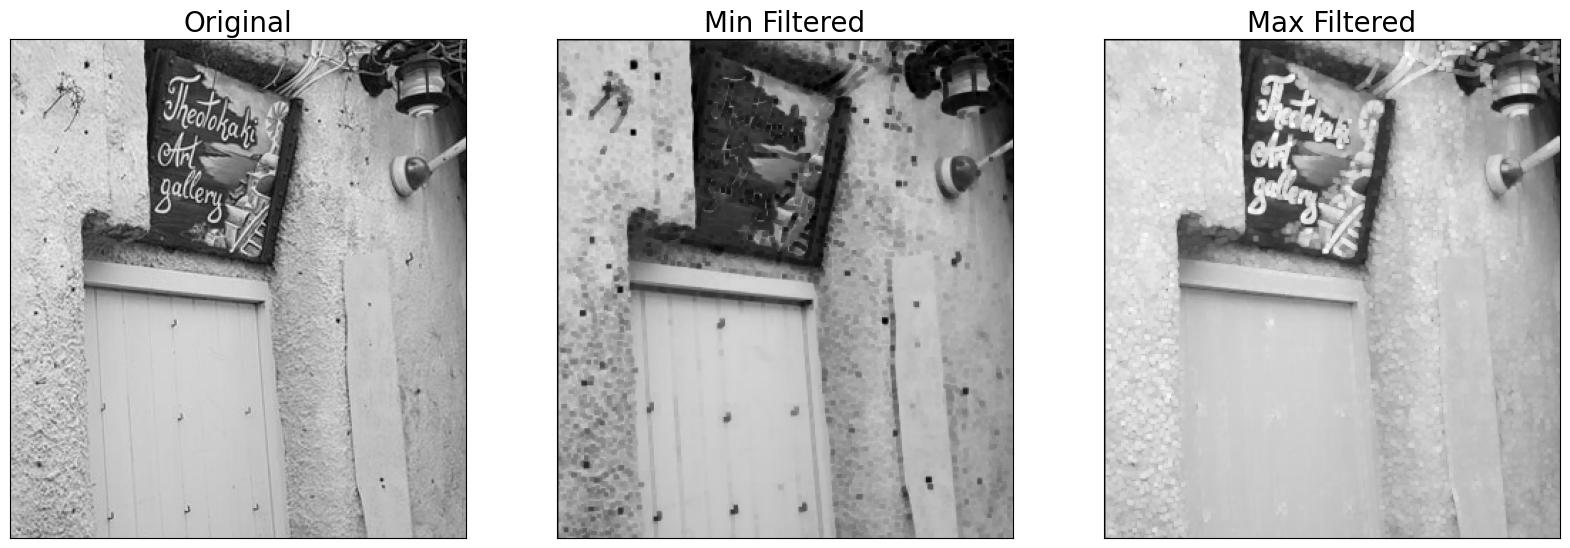

In [13]:
image = cv2.imread("./images/chap07/min_max.jpg", cv2.IMREAD_GRAYSCALE)

show_images({"Original": image, "Min Filtered": min_max_filter(image, 3, "min"), "Max Filtered": min_max_filter(image, 3, "max")}, 20)

---

- ## 평균값 필터링
    - ### 블러링 효과 나타남
    - ### cv2.blur(image, mask_size, anchor, borderType)
        - #### borderType
            - #### cv2.BORDER_CONSTANT: 특정 상수값으로 대체
            - #### cv2.BORDER_REPLICATE: 계산 가능한 가장 가까운 원소값으로 대체
              ![image](https://github.com/kks00/visual_info_processing/assets/68108664/66c08a10-d464-4ee8-854a-964eb9c4de40)
            - #### cv2.BORDER_REFLECT: 계산 가능한 가까운 출력 화소와 대칭되게 채우기
              ![image](https://github.com/kks00/visual_info_processing/assets/68108664/badb00f3-4829-4d47-8401-6aa61911c758)
            - #### cv2.BORDER_WRAP: 영상의 양 끝이 일치하게 채우기
              ![image](https://github.com/kks00/visual_info_processing/assets/68108664/9a0bcc34-b0bc-4635-8e43-fdd432c90843)

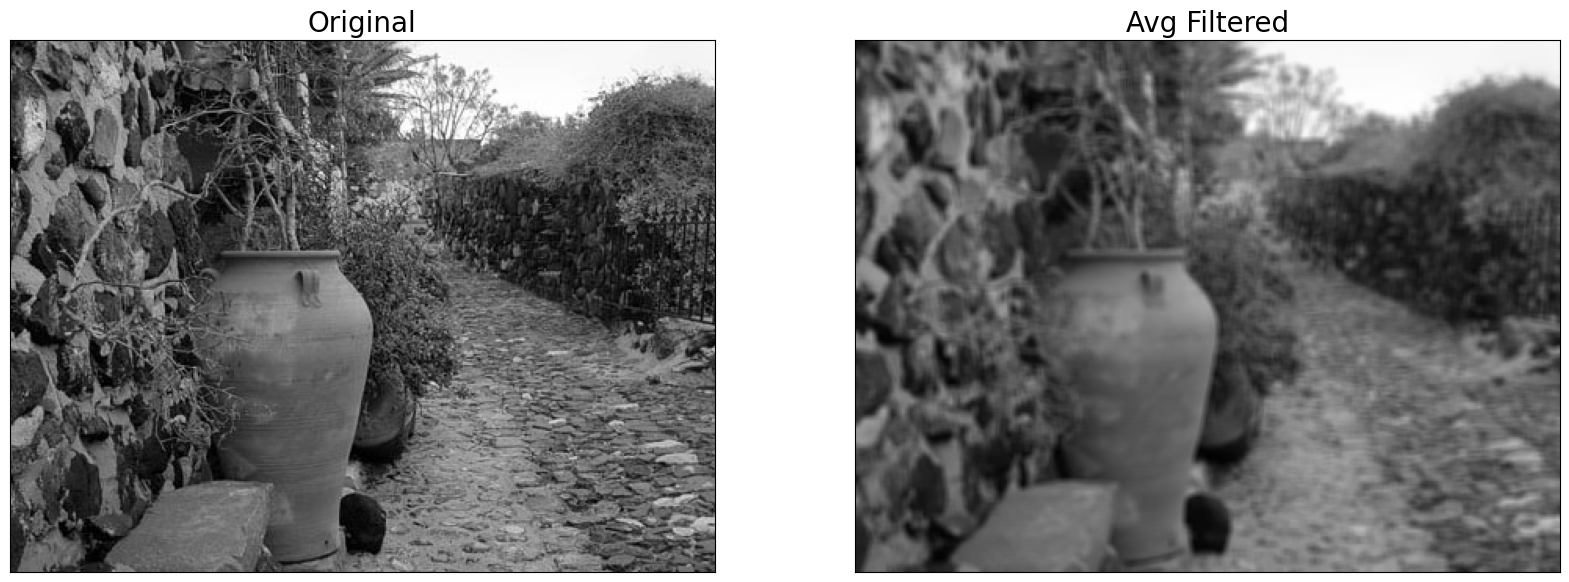

In [28]:
image = cv2.imread("./images/chap07/filter_avg.jpg", cv2.IMREAD_GRAYSCALE)
blurred = cv2.blur(image, (5, 5), anchor=(-1, -1), borderType=cv2.BORDER_REFLECT)

show_images({"Original": image, "Avg Filtered": blurred}, 20)

- ### 블러링 효과 나타남

---

- ## 미디언 필터링
    - #### 중간값 이외의 값들은 제거되므로 잡음을 잘 제거해줌

In [30]:
def median_filter(image, k):
    filtered = np.zeros(image.shape[:2], dtype="uint8")

    image_h, image_w = image.shape[:2]
    filter_margin = k // 2
    for y in range(filter_margin, image_h - filter_margin + 1):
        for x in range(filter_margin, image_w  - filter_margin + 1):
            curr_region = image[y - filter_margin: y + filter_margin + 1, x - filter_margin: x + filter_margin + 1]
            filtered[y][x] = np.median(curr_region.reshape(-1))
    
    return np.uint8(filtered)

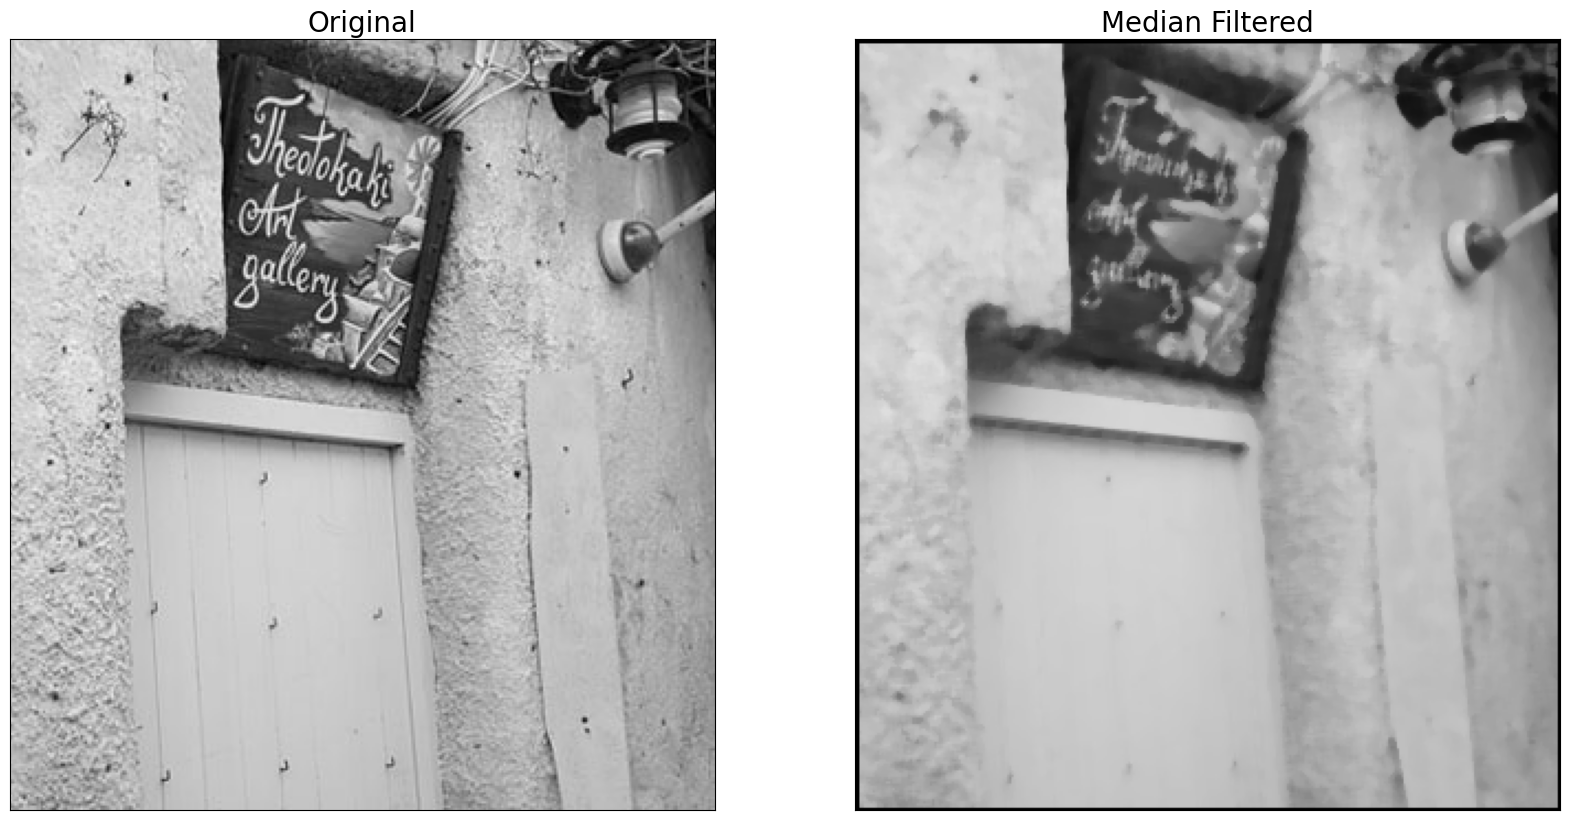

In [31]:
image = cv2.imread("./images/chap07/median.jpg", cv2.IMREAD_GRAYSCALE)

show_images({"Original": image, "Median Filtered": median_filter(image, 5)}, 20)

---

- ## 가우시안 스무딩 필터링
    - #### 가우시안 분포를 마스크의 계수로 사용하여 회선 수행
    - #### 마스크 원소의 합 1
    - #### 표준 편차가 클수록 블러링 정도가 심해짐
      ![image](https://github.com/kks00/visual_info_processing/assets/68108664/c3ae9a6e-1f00-4ed8-8e21-e5e8c8cd3fad)

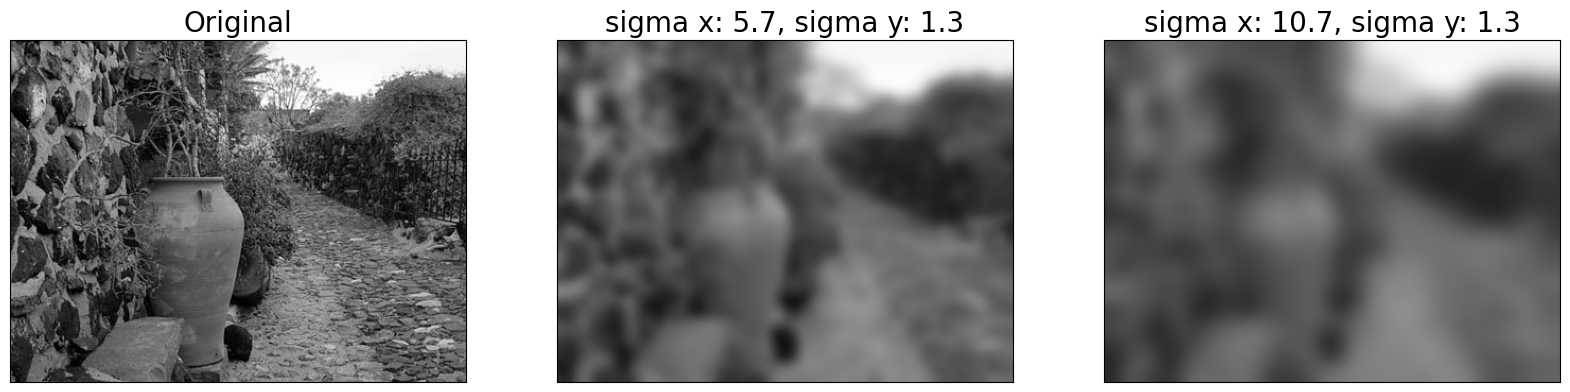

In [47]:
image = cv2.imread("./images/chap07/smoothing.jpg", cv2.IMREAD_GRAYSCALE)

filtered1 = cv2.GaussianBlur(image, (0, 0), 5.7, 1.3)
filtered2 = cv2.GaussianBlur(image, (0, 0), 10.7, 1.3)

show_images({"Original": image, "sigma x: 5.7, sigma y: 1.3": filtered1, "sigma x: 10.7, sigma y: 1.3": filtered2}, 20)